In [24]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.learning_curve import learning_curve
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.externals import joblib

In [25]:
data = pd.read_csv("austin_final.csv")
Y_temp = data['PrecipitationSumInches']
X = data.drop(['PrecipitationSumInches'], axis=1,inplace=True)
Y_temp = Y_temp.values.reshape(-1, 1)

In [26]:
for i in range(Y_temp.size):
    if(Y_temp[i]<0.001):
        Y_temp[i]=1
       # x1.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.001 and Y_temp[i]<0.1):
        Y_temp[i]=2
       # x2.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.1 and Y_temp[i]<1.2):
        Y_temp[i]=3
        #x3.loc[i] = X.loc[i]
    else:
        Y_temp[i]=4
       # x4.loc[i] = X.loc[i]

Y = np.array(Y)#.reshape(len(Y), )
X_train, X_test, y_train, y_test = train_test_split(data, Y_temp, test_size=0.2,shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1044, 16) (1044, 1)
(261, 16) (261, 1)


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAIN ACCURACY 0.7586206896551724
Drizzles
No Rain
No Rain
No Rain
No Rain
Moderate Rains
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
Moderate Rains
No Rain
No Rain
Drizzles
No Rain
No Rain
No Rain
No Rain
No Rain
Drizzles
No Rain
No Rain
No Rain
No Rain
Moderate Rains
No Rain
No Rain
No Rain
No Rain
Moderate Rains
No Rain
No Rain
No Rain
No Rain
Drizzles
Heavy Rains
No Rain
No Rain
Moderate Rains
Drizzles
No Rain
No Rain
No Rain
No Rain
Drizzles
No Rain
No Rain
No Rain
No Rain
Moderate Rains
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
Drizzles
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
Drizzles
Drizzles
No Rain
No Rain
Moderate Rains
No Rain
No Rain
No Rain
Moderate Rains
Moderate Rains
Drizzles
No Rain
No Rain
No Rain
No Rain
Moderate Rains
No Rain
No Rain
Moderate Rains
No Rain
No Rain
No Rain
Moderate Rains
No Rain
No Rain
No Rain
No Rain
No Rain
Heavy Rains
Moderate Rains
Drizzles
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain
No Rain


Text(0,0.5,'Prediction')

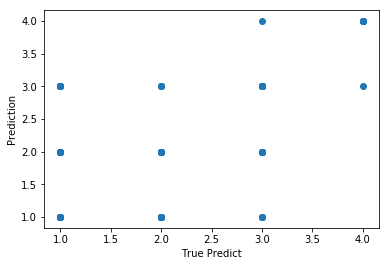

In [28]:
logr = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train, y_train)
#logr = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1).fit(X_train,y_train)
#logr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=30).fit(X_train,y_train)
print("TRAIN ACCURACY",logr.score(X_train,y_train))
"""
train_sizes, train_scores, test_scores = learning_curve(logr, X_train, y_train, n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)    
plt.figure()
plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
 # box-like grid
plt.grid()
# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")    
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show()
"""
predictions=logr.predict(X_test)
classes = ['None', 'No Rain', 'Drizzles', 'Moderate Rains', 'Heavy Rains']
for i in range(len(predictions)):
           print(classes[int(predictions[i])])
plt.scatter(y_test, predictions)
print("TEST ACCURACY",logr.score(X_test,y_test))
plt.xlabel("True Predict")
plt.ylabel("Prediction")
#print(accuracy_score(y_train, , normalize=True, sample_weight=None))

In [33]:
#saving the weights
joblib.dump(logr,'weights1.joblib')

['weights1.joblib']

In [30]:
clf = joblib.load('weights.joblib') 

In [31]:
#A single data to check and predict rain type other than the test set
input = np.array([[58], [43], [28], [37], [22], [40], [75], [49], [22], [30.35], [10], [10], [10], [14], [4], [21]])
input = input.reshape(1, -1)
#prediction
print(classes[int(clf.predict(input))])

No Rain
